# Fintech Project
## Group 13

### Abstract

Our aim is to...


# **Table of Contents**

1. [Introduction: Final Project – Group 13](#sec-1-introduction)
2. [Prediction](#sec-2-prediction)
3. [Replica](#sec-3-replica)
4. [Anomaly Detection](#sec-4-anomaly-detection)
5. [Results](#sec-5-results)





<a id="sec-1-introduction"></a>
## 1. Introduction: Final Project – Group 13

*(Your “Introduction” content goes here.)*

<a id="sec-2-prediction"></a>
## 2. Prediction
# 🔍 Predictor Class — Full Pipeline Overview

## 🎯 Goal
This module implements a comprehensive *supervised learning pipeline* to jointly predict two binary financial needs:
- *AccumulationInvestment*
- *IncomeInvestment*

The approach emphasizes business interpretability, robust preprocessing, customized evaluation, and flexible inference, all wrapped into a reusable Python class.

---

## 📁 1. Data Input & Variable Overview
The class loads structured data from an Excel file containing three sheets:
- Needs: behavioral and demographic client features + binary labels
- Products: product metadata (descriptive only)
- Metadata: variable dictionary used for readable summaries

A profiler generates summary tables (mean, std, min, max, missing count, description) for both Needs and Products.

---

## ⚙ 2. Feature Engineering
Two transformations are applied to numerical features to stabilize distributions:
- Wealth → *log1p* transform (to reduce right-skew)
- Income → *power transform* with exponent 0.3 (approximate Box-Cox)

Then, a *Min-Max normalization* is applied to all key numeric predictors:
- Age, FamilyMembers, RiskPropensity
- Log_Wealth, Power_Income_0.3

The original Wealth and Income features are dropped.

---

## 📊 3. Exploratory Data Analysis (EDA)
The eda() method generates plots to understand:
- Class balance for both targets
- Distributional normality (histograms + Q-Q plots)
- Correlation heatmaps
- Boxplots and violin plots grouped by target
- Joint distributions of income and wealth
- Feature distributions across class labels

---

## ⚖ 4. Custom Evaluation Metric
A *custom penalty score* is defined using a cost_map_single, which captures asymmetric misclassification costs tailored to the business context. This is computed for all model evaluations alongside standard metrics (accuracy, precision, recall, F1).

---

## 🧪 5. Model Training – Single Label
For individual target modeling:
- *Stratified train-test split* (default 80/20)
- *Optuna optimization* searches the best hyperparameters (RandomForest) using F1 as the CV objective
- *Cross-validation metrics* (5-fold) are collected
- *Threshold τ tuning* selects the decision threshold that maximizes F1 (or minimizes custom penalty)
- Final model is evaluated on the hold-out test set

---

## 🔁 6. Model Training – Joint Targets
The train_evaluate_joint() method:
- Trains a *MultiOutputClassifier* using the same base model
- Performs *K-fold CV* and collects *out-of-fold probabilities* for each label
- Tunes a separate *τ threshold per target* based on validation results
- Trains a final joint model on all training data
- Evaluates it on the test set and saves:
  - A summary report of mean ± std across folds
  - A test report with final metrics
  - Optimal thresholds (tau_dict)
  - The full model to disk via joblib

---

## 🧠 7. Prediction on New Clients
The class supports real-time prediction for new client records via:
- pred_new_client() → for a single target
- pred_new_client_joint() → for both targets simultaneously

These methods:
- Apply all saved transformations (log, power, scaling)
- Clip inputs to match training data bounds
- Output both the predicted label and its associated probability
- Use learned τ thresholds for final decision

---

## 🛠 8. Optuna Integration
study_optuna() handles:
- Hyperparameter tuning of the RandomForest using Stratified K-Fold CV
- F1 score as the target metric
- Persistent storage of the study in SQLite to resume or inspect
- Optional optimization history plot visualization

---

## ✅ 9. Output & Artifacts
- Clean CV and test set metric tables (print-ready with tabulate)
- Stored joint model (.joblib) and thresholds (tau_dict.json)
- Modular and scalable design for experimentation or deployment

---

## 📦 Summary
This class combines preprocessing, feature engineering, model tuning, validation, evaluation, and explainability into a unified and reusable object-oriented structure. It is ready to be extended to:
- Additional targets
- Alternative models (e.g., XGBoost, LightGBM)
- Model interpretability tools (already partially integrated via SHAP/plot functions)

You can integrate it directly into a notebook workflow or deploy it in a production inference environment.


In [ ]:
from Predictor import Predictor
from sklearn.ensemble import RandomForestClassifier
from nba import PortfolioRecommender



In [2]:

model = RandomForestClassifier(
    n_estimators=150,
    max_depth=30,
    min_samples_split=5,
    min_samples_leaf=2,
    max_features='sqrt',
    bootstrap=True,
    class_weight='balanced',
    random_state=42
)




NEEDS VARIABLES SUMMARY:


Variable,Description,Mean,Std,Missing,Min,Max
Age,"Age, in years",55.25,11.97,0,18.00,97.00
Gender,"Gender (Female = 1, Male = 0)",0.49,0.50,0,0.00,1.00
FamilyMembers,Number of components,2.51,0.76,0,1.00,5.00
FinancialEducation,Normalized level of Financial Education (estimate),0.42,0.15,0,0.04,0.90
RiskPropensity,Normalized Risk propensity from MIFID profile,0.36,0.15,0,0.02,0.88
Income,Income (thousands of euros); estimate,62.99,44.36,0,1.54,365.32
Wealth,Wealth (thousands of euros); sum of investments and cash accounts,93.81,105.47,0,1.06,2233.23
IncomeInvestment,Boolean variable for Income investment; 1 = High propensity,0.38,0.49,0,0.00,1.00
AccumulationInvestment,Boolean variable for Accumulation/growth investment; 1 = High propensity,0.51,0.50,0,0.00,1.00



PRODUCTS VARIABLES SUMMARY:


Variable,Description,Mean,Std,Missing,Min,Max
IDProduct,Product description,6.00,3.32,0,1.00,11.00
Type,"1 = Accumulation product, 0 = Income product",0.64,0.50,0,0.00,1.00
Risk,Normalized Synthetic Risk Indicator,0.43,0.24,0,0.12,0.88


Shapiro-Wilk test for Power_Income_0.3: Statistic=0.9988864806036369, p-value=0.0018805509981543013
Power_Income_0.3 does not follow a normal distribution (Shapiro-Wilk test).
KS test for Power_Income_0.3: Statistic=0.011124622387602326, p-value=0.5621823732270469
Power_Income_0.3 follows a normal distribution (KS test).

Shapiro-Wilk test for Power_Income_0.3: Statistic=0.9988864806036369, p-value=0.0018805509981543013


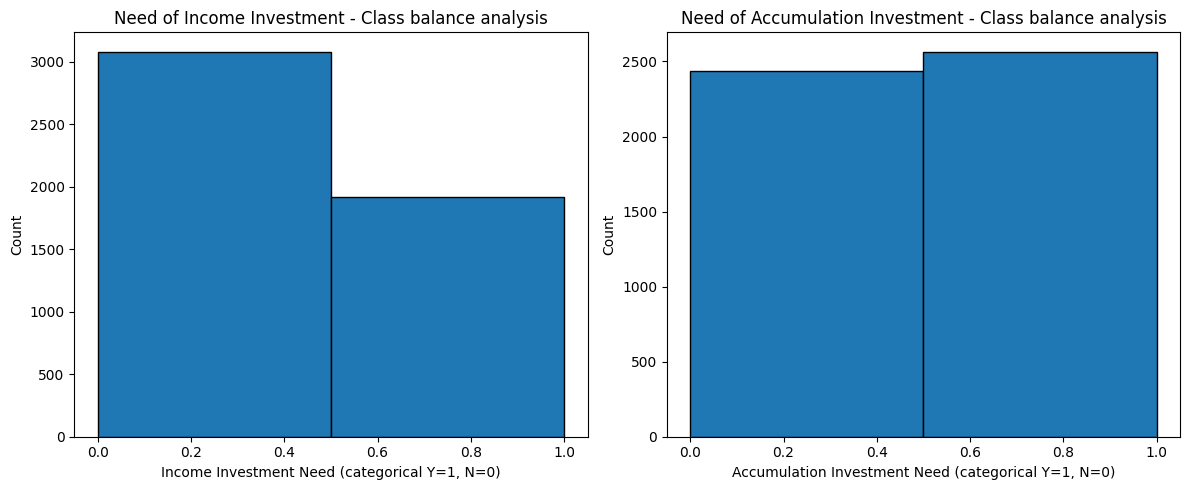

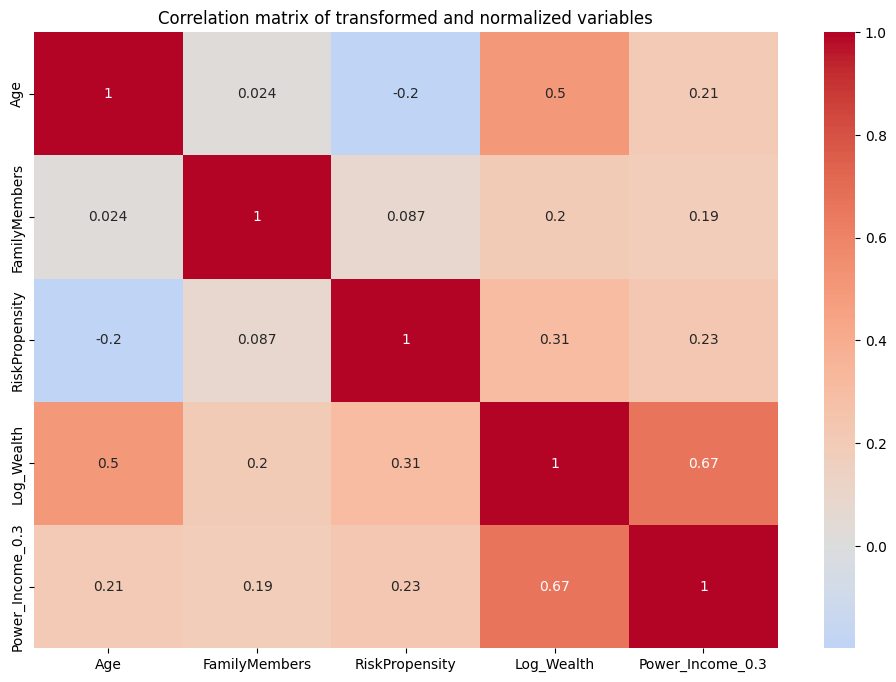

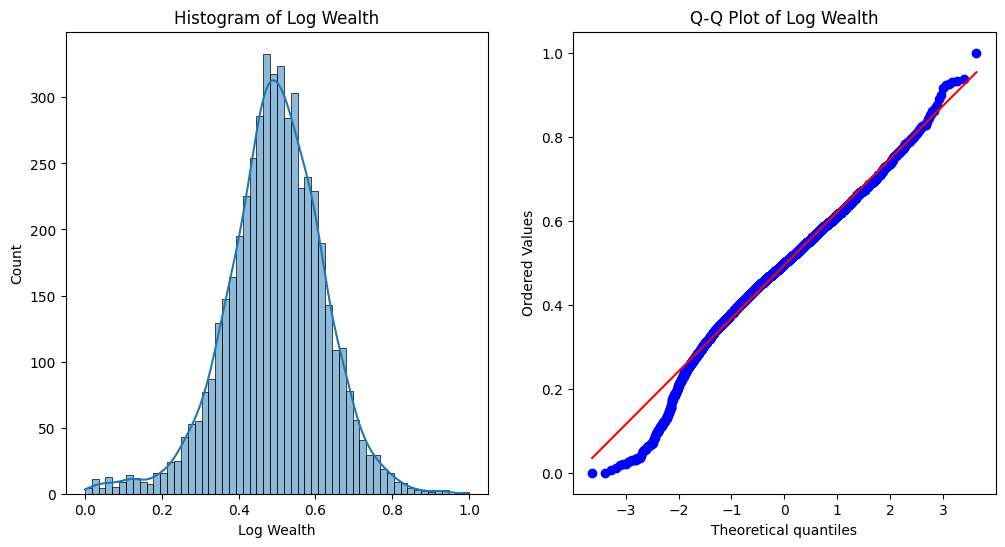

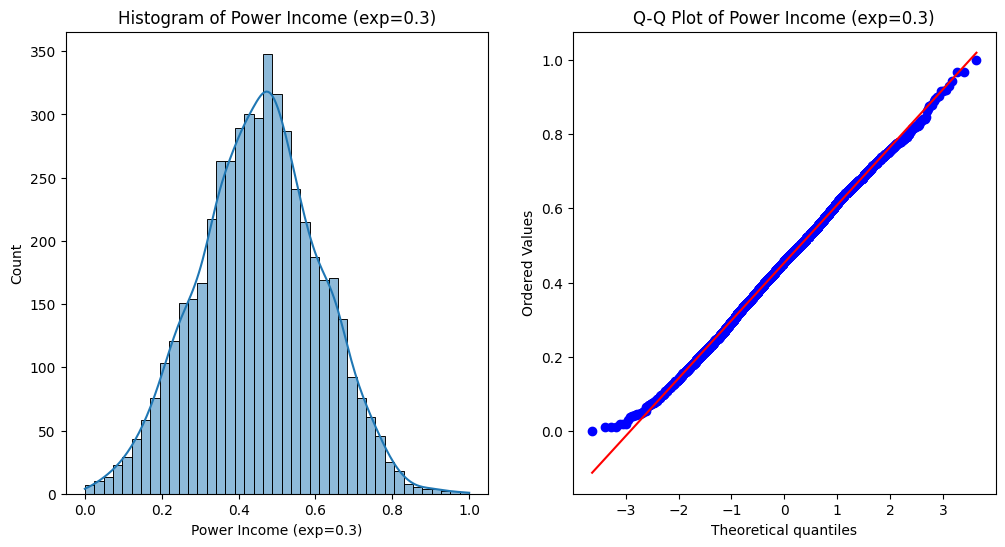

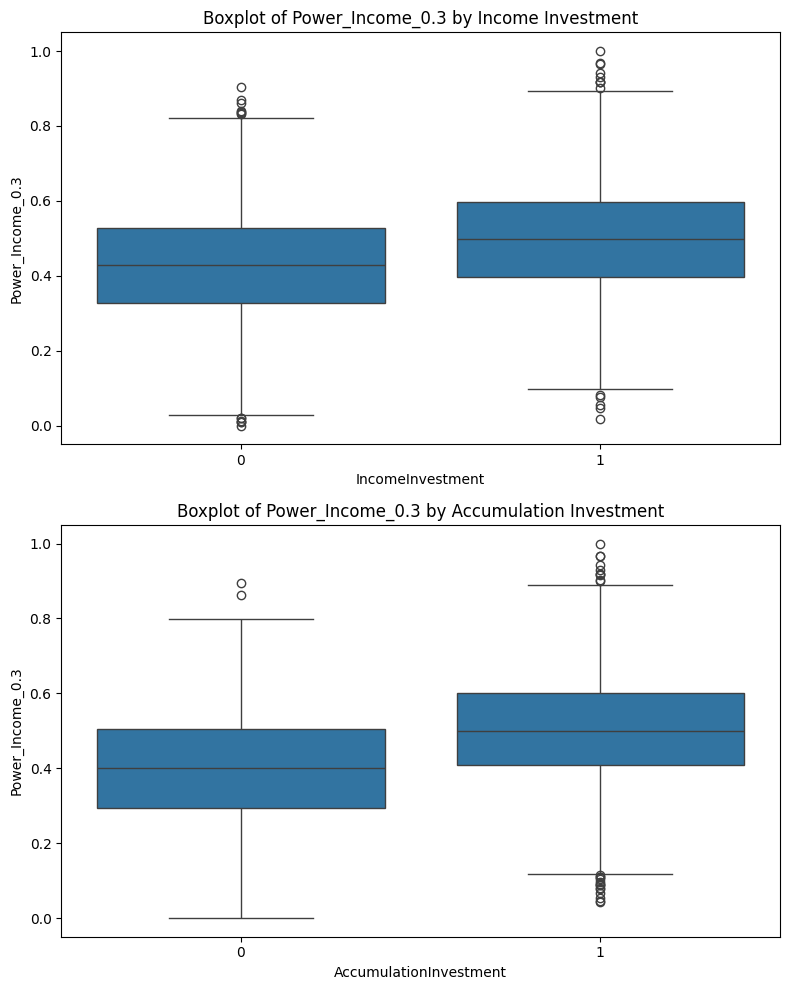

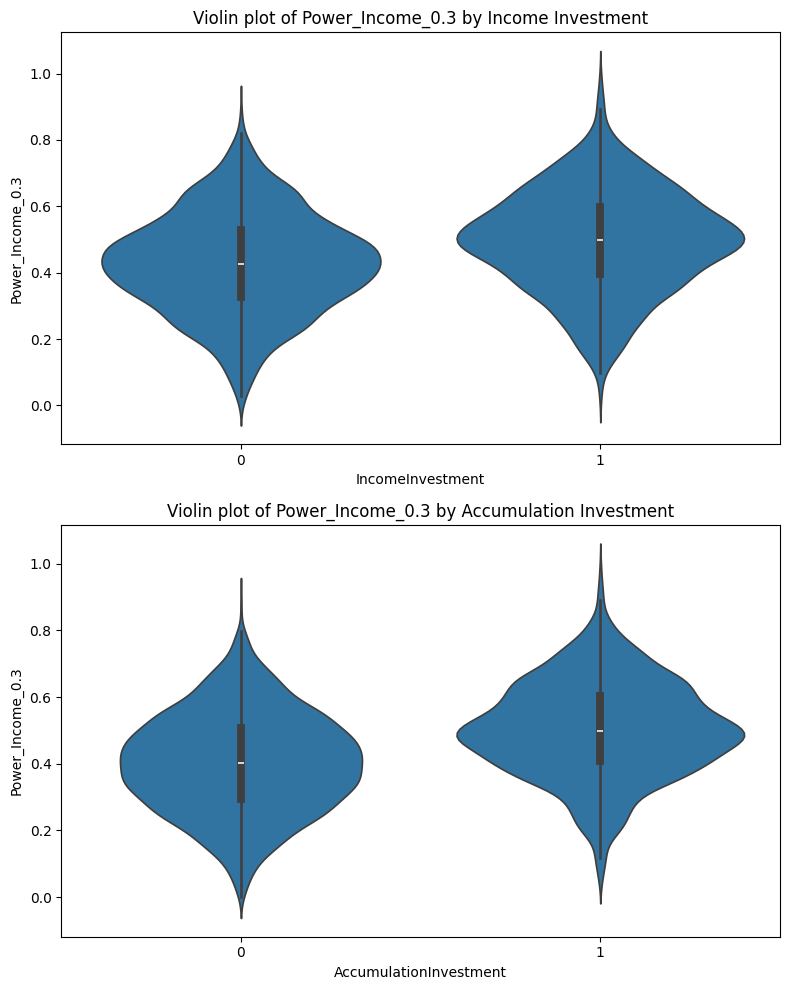

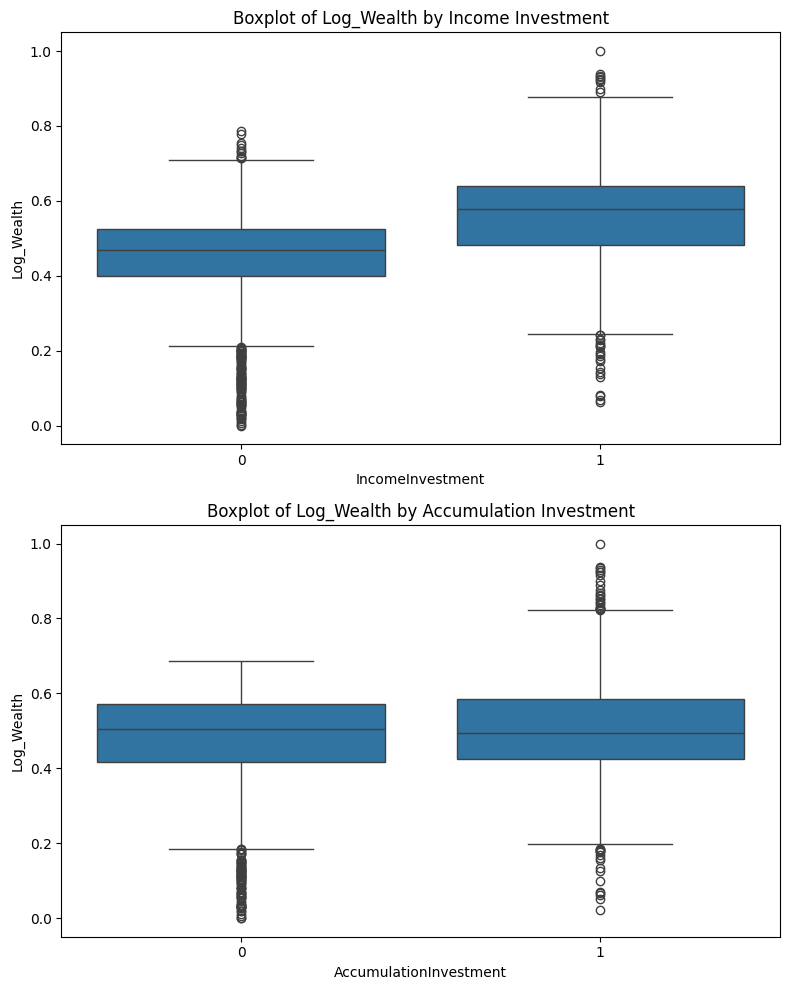

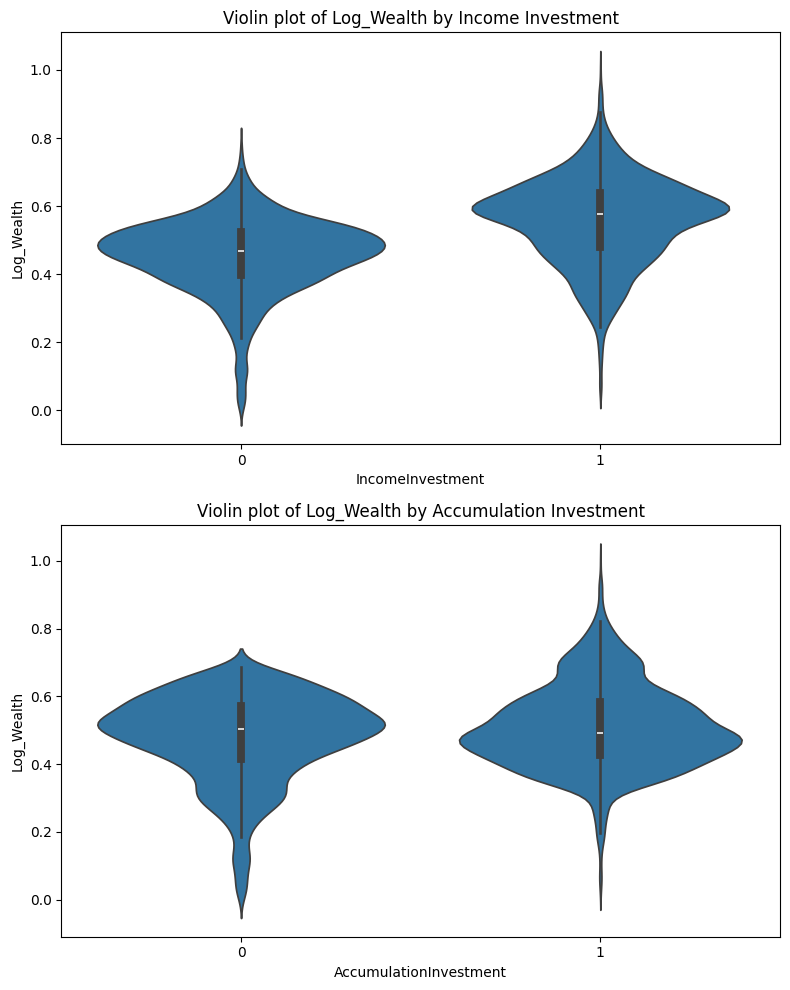

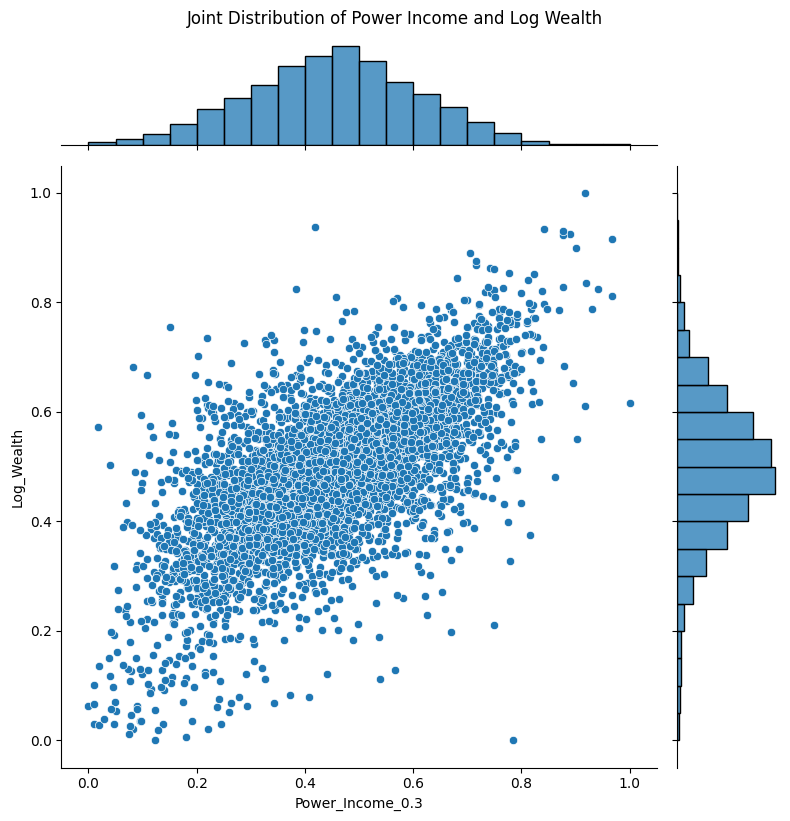

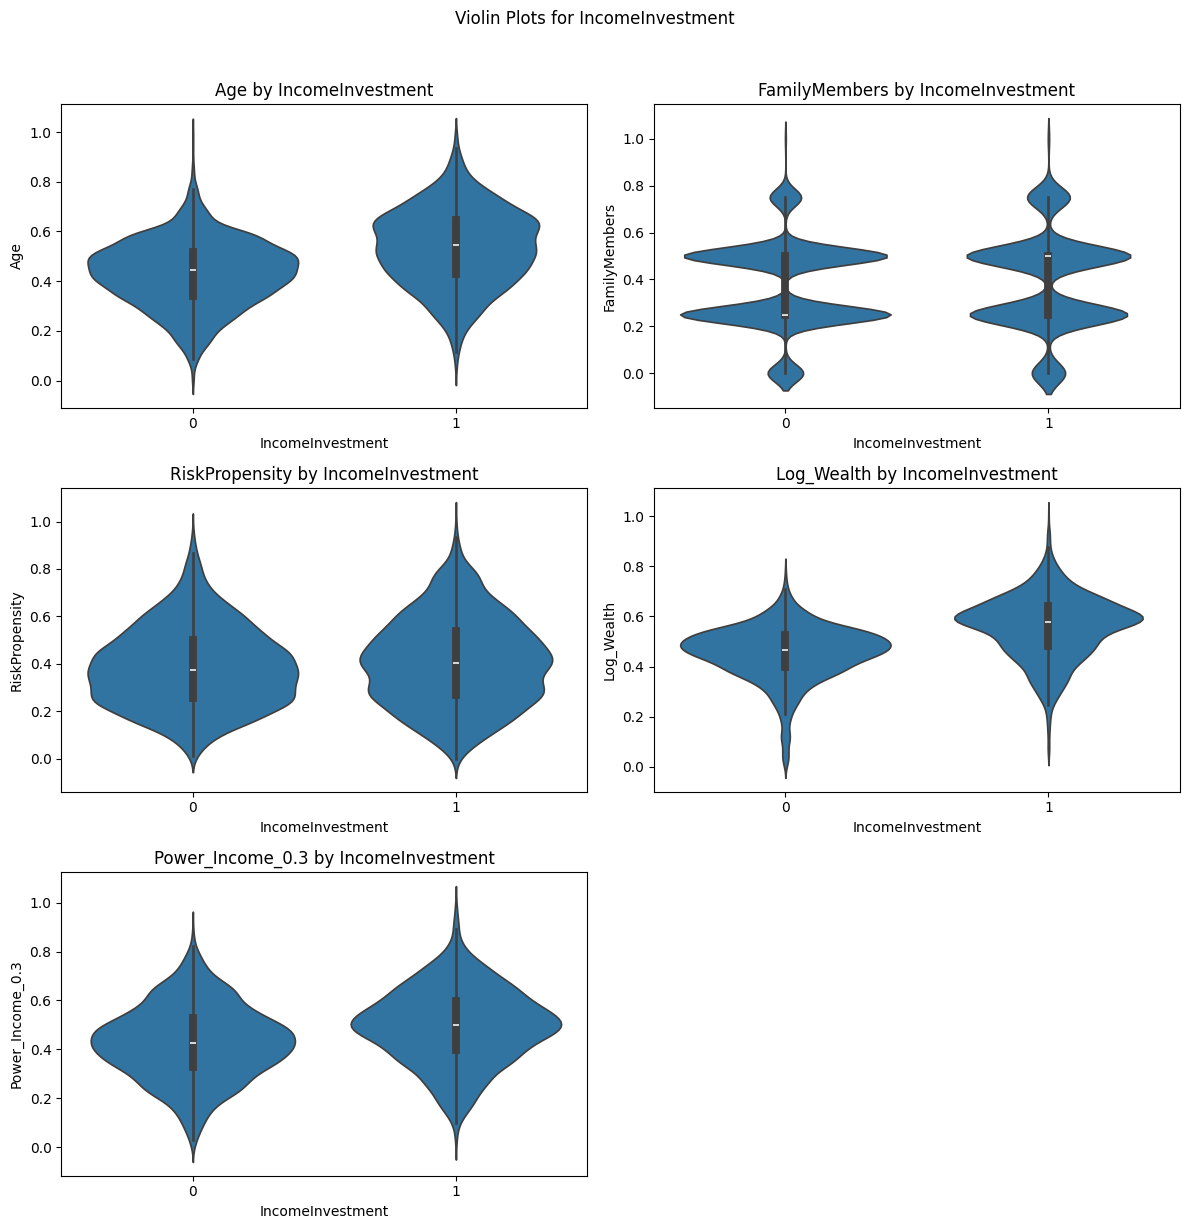

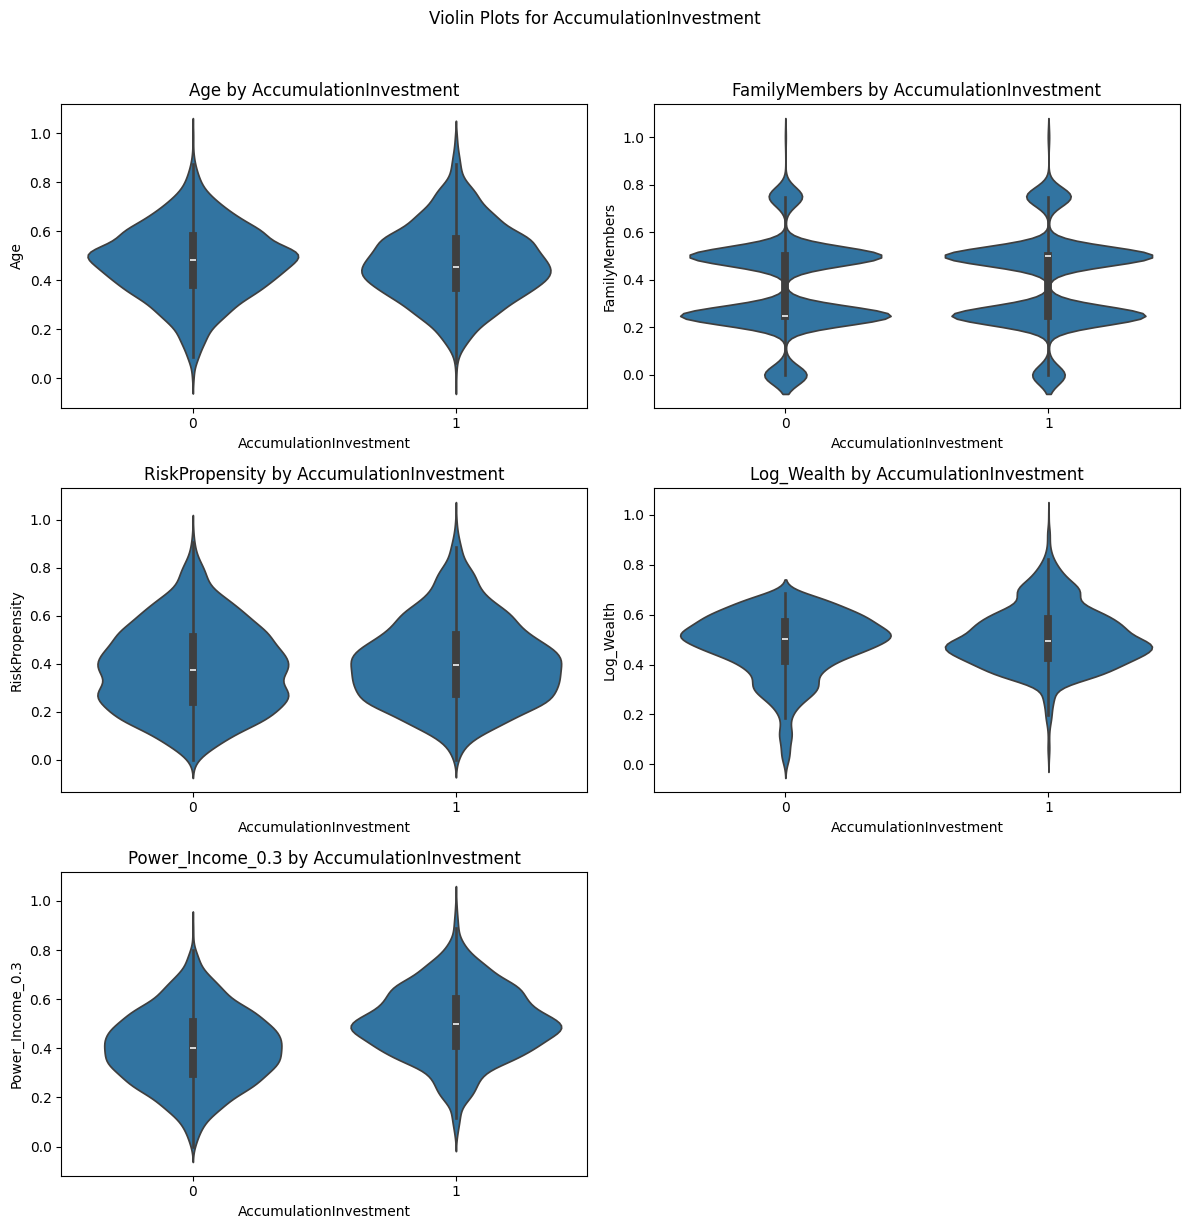

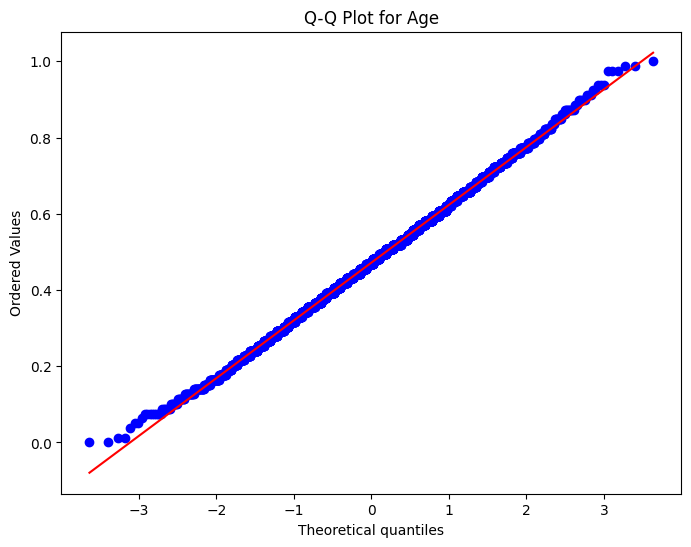

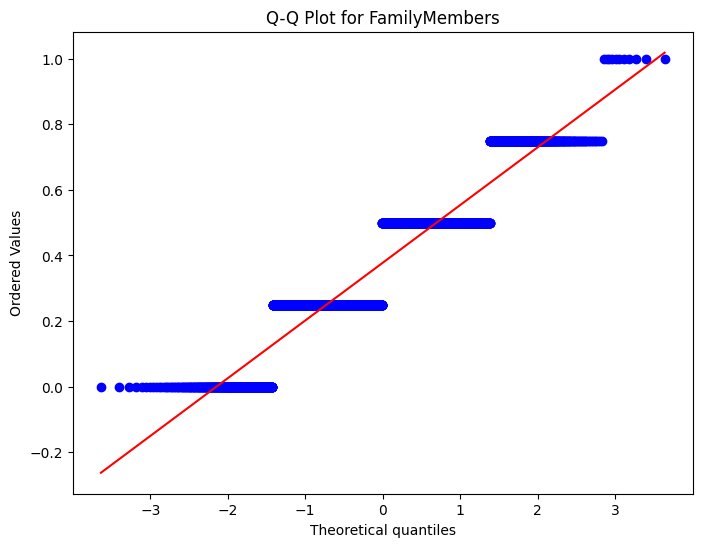

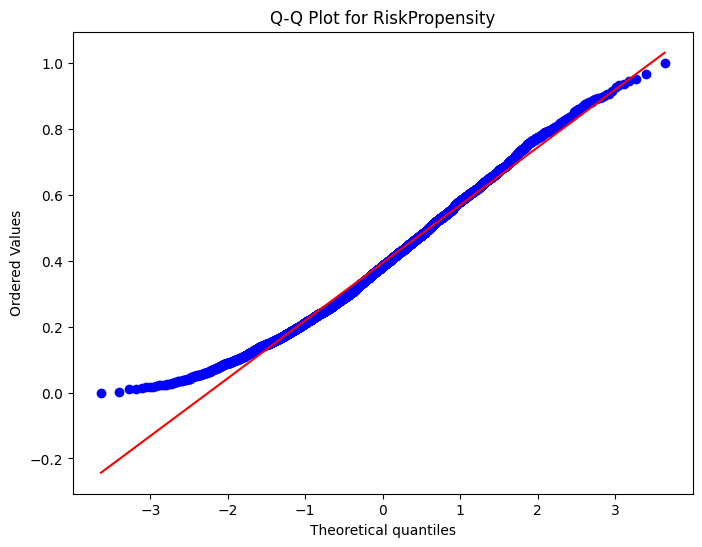

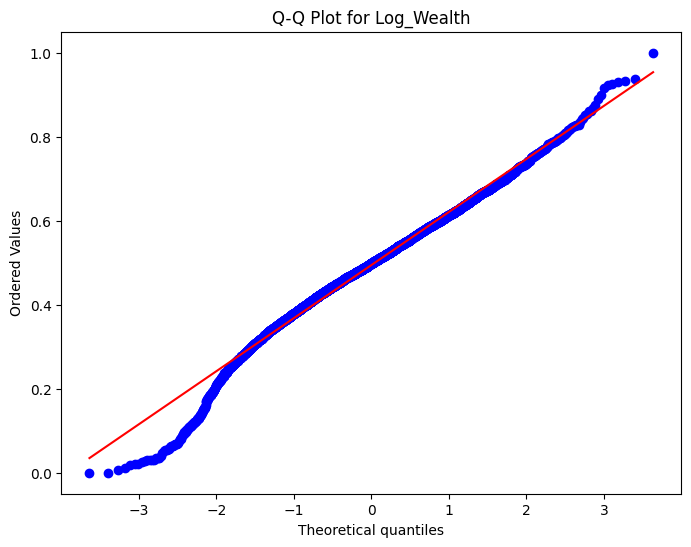

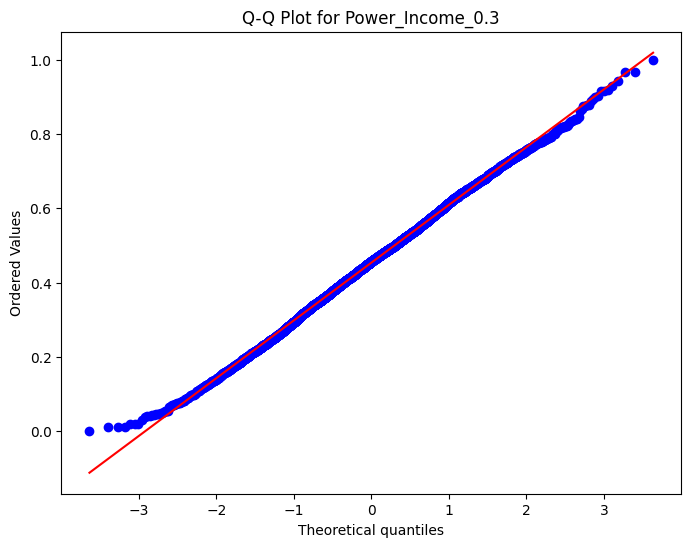

In [3]:

pred = Predictor(model)
pred.eda()


Optimal τ for AccumulationInvestment: 0.494
Optimal τ for IncomeInvestment: 0.515

Random Forest - AccumulationInvestment
+---+----------------+---------+--------+----------+
|   |     Metric     | CV Mean | CV Std | Test Set |
+---+----------------+---------+--------+----------+
| 0 |    Accuracy    |  0.791  | 0.025  |   0.8    |
| 1 |   Precision    |  0.833  | 0.017  |   0.84   |
| 2 |     Recall     |  0.742  | 0.035  |  0.751   |
| 3 |       F1       |  0.785  | 0.027  |  0.793   |
| 4 | Custom Penalty |  0.144  | 0.018  |  0.138   |
+---+----------------+---------+--------+----------+

Random Forest - IncomeInvestment
+---+----------------+---------+--------+----------+
|   |     Metric     | CV Mean | CV Std | Test Set |
+---+----------------+---------+--------+----------+
| 0 |    Accuracy    |  0.803  | 0.015  |  0.801   |
| 1 |   Precision    |  0.83   | 0.017  |   0.84   |
| 2 |     Recall     |  0.615  | 0.024  |  0.591   |
| 3 |       F1       |  0.706  | 0.016  |  0.693 

<Figure size 600x600 with 0 Axes>

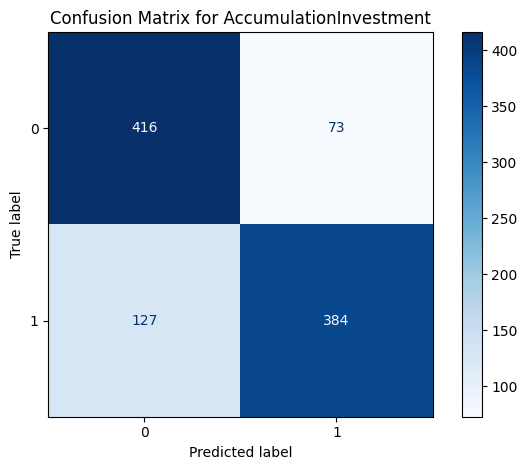

<Figure size 600x600 with 0 Axes>

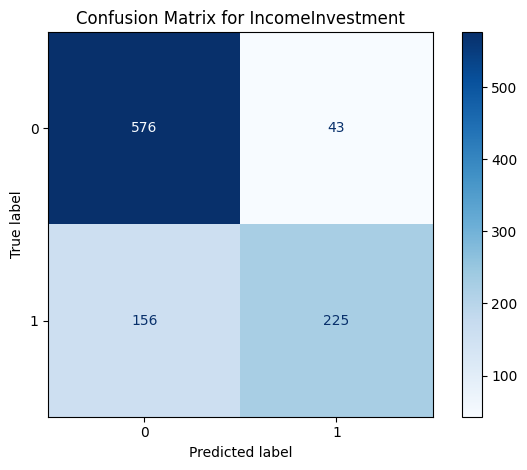

In [4]:
cv_report, test_report, tau_dict = pred.train_evaluate_joint()

### Explanatory part


Explaining target: AccumulationInvestment


<Figure size 1000x800 with 0 Axes>

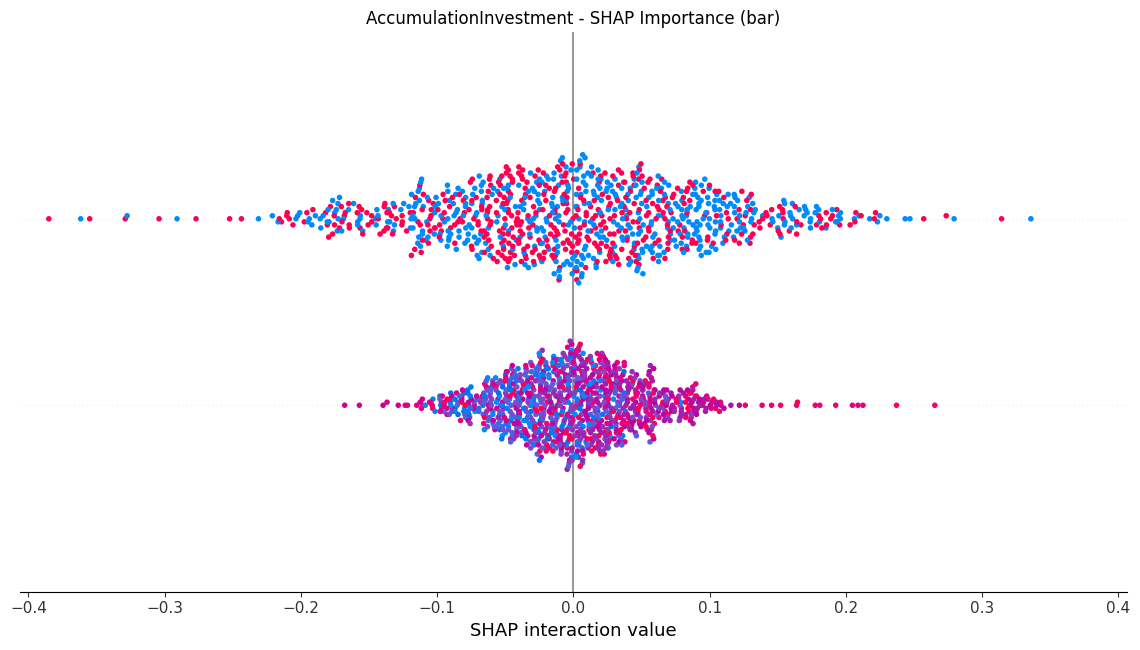

<Figure size 1000x800 with 0 Axes>

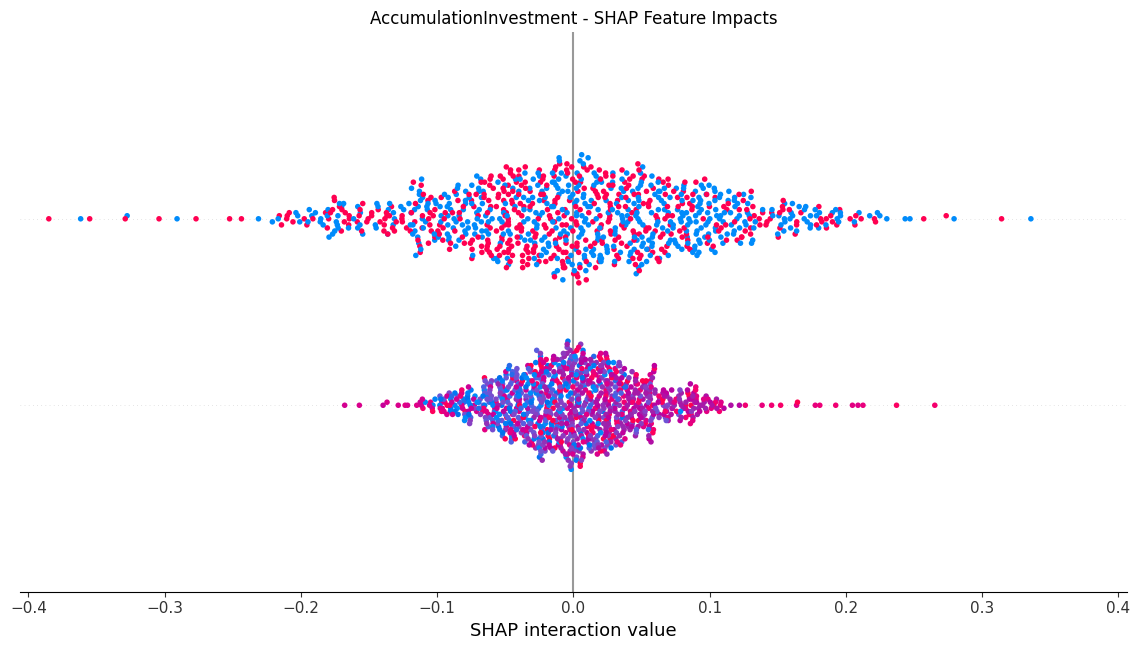

c:\Users\andre\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


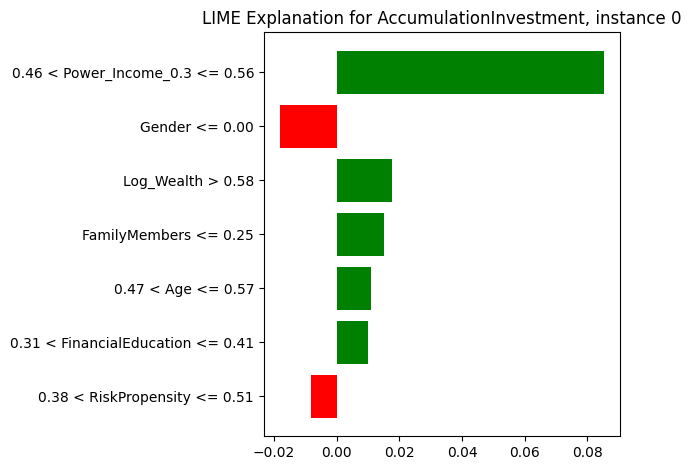


Explaining target: IncomeInvestment


<Figure size 1000x800 with 0 Axes>

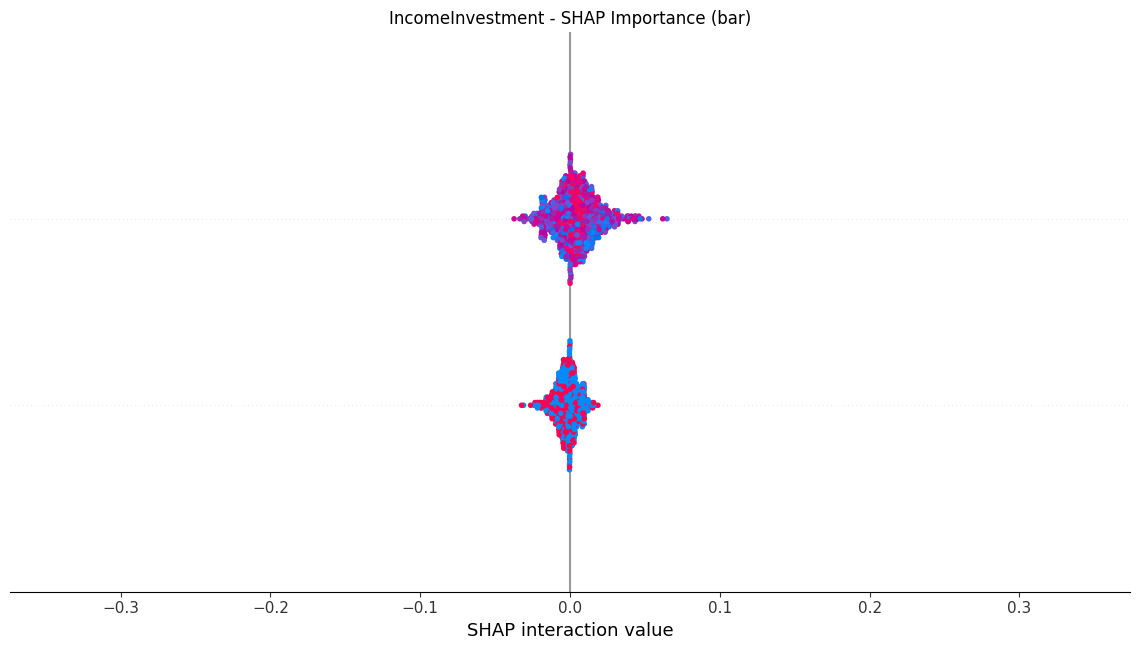

<Figure size 1000x800 with 0 Axes>

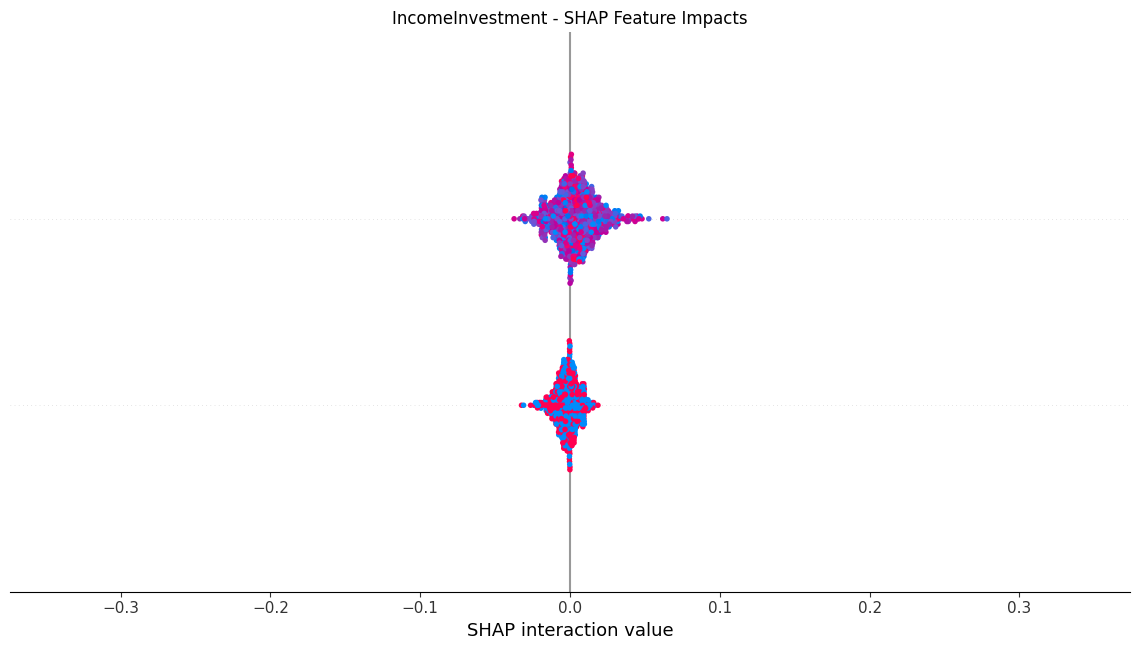

c:\Users\andre\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


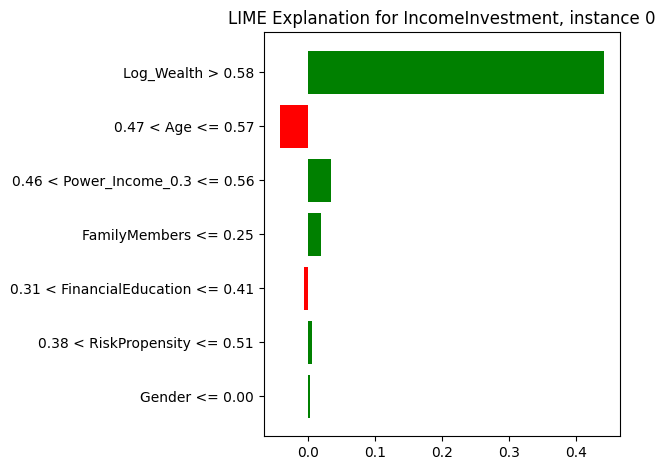

In [5]:
pred.explainability()

<a id="sec-3-replica"></a>
## 3. Replica

*(Your “Introduction” content goes here.)*

<a id="sec-4-anomaly-detection"></a>
## 4. Anomaly Detection

*(Your “Introduction” content goes here.)*

<a id="sec-5-results"></a>
## 5. Results

# Portfolio Recommendation Class: Overview and Strategy

Below is a high‐level description of the **`PortfolioRecommender`** class—what it does, how it works, and the design choices behind each step. You can include this markdown in your report or presentation slides to explain the motivation, logic, and plotting/analysis steps clearly.  

---

## Purpose of the Class

The `PortfolioRecommender` class is designed to:
1. **Identify which clients** in the test set (from a trained `Predictor` model) have a positive prediction for **either** “Income” or “Accumulation” investment need.
2. **Match each eligible client** to exactly one product from a pre‐defined set of portfolios, chosen to maximize potential return while respecting each client’s risk tolerance.
3. **Report and visualize**:
   - A table of recommended products per client (Client ID, recommended product, client risk, chosen product risk).
   - Summary statistics (how many clients got a recommendation, percent coverage).
   - A **scatter plot** showing each client’s risk vs. recommended product risk, with an ideal “1:1” reference line.
   - A **bar chart** of how often each product was recommended.
   - A **histogram** of the risk‐propensity distribution among clients who actually received a recommendation.




Top 10 personalized recommendations (Accumulation):
   ClientID RecommendedProductID  ClientRiskPropensity  ProductRiskLevel
0      1055           ETF_equity              0.886629          0.428571
1       705           ETF_equity              0.546680          0.428571
2      2413             ETF_life              0.322982          0.285714
3       228             ETF_bond              0.249575          0.142857
4      3543             ETF_bond              0.176628          0.142857
5      1073             ETF_bond              0.244927          0.142857
6      1084             ETF_bond              0.229342          0.142857
7       926           ETF_equity              0.489888          0.428571
8      3049             ETF_life              0.393746          0.285714
9      1117             ETF_life              0.298237          0.285714

Recommendation statistics (Accumulation):
  Total customers analyzed:                 454
  Customers with valid recommendations:     437 (96.2

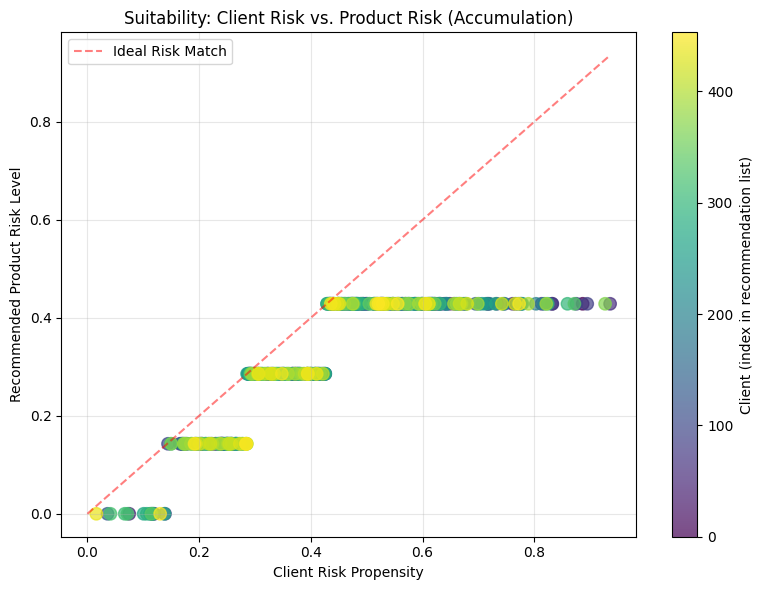

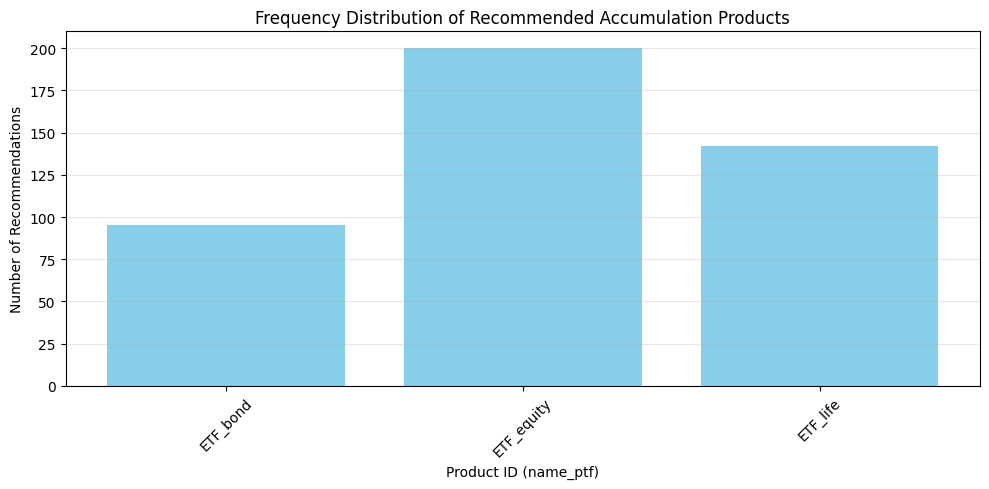


Most recommended Accumulation products (Top 3):
  • Product 'ETF_equity': Risk = 0.42857142857142855  → recommended to 200 clients
  • Product 'ETF_life': Risk = 0.2857142857142857  → recommended to 142 clients
  • Product 'ETF_bond': Risk = 0.14285714285714285  → recommended to 95 clients


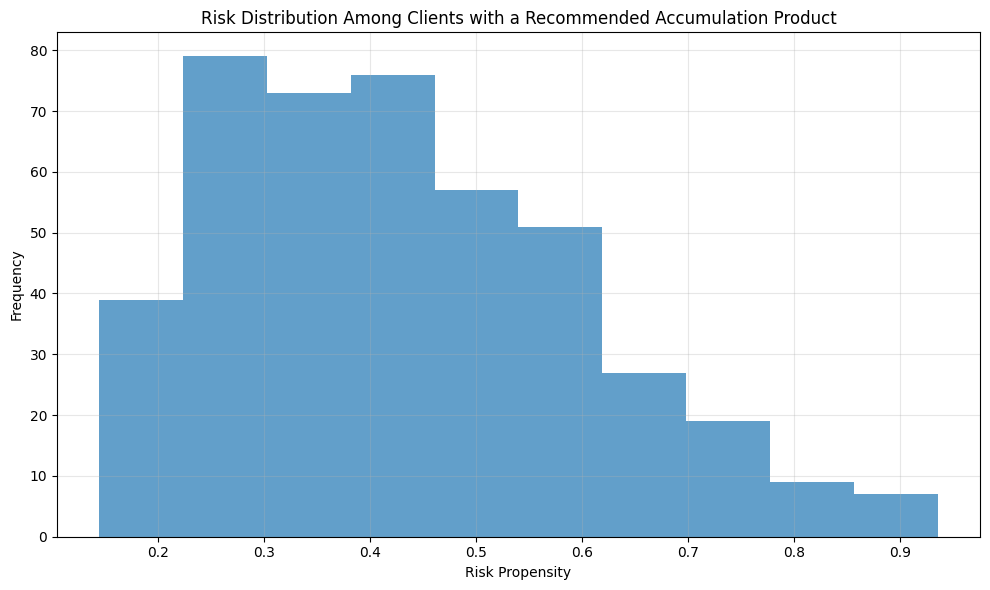


Top 10 personalized recommendations (Income):
   ClientID RecommendedProductID  ClientRiskPropensity  ProductRiskLevel
0      1501           ETF_equity              0.456613          0.428571
1       705           ETF_equity              0.546680          0.428571
2       589           ETF_equity              0.452225          0.428571
3      2468        active_equity              0.595310          0.571429
4       794                    0              0.041064          0.000000
5      3021          active_bond              0.350092          0.285714
6      1117          active_bond              0.298237          0.285714
7       501           ETF_equity              0.440671          0.428571
8      4684        active_equity              0.616421          0.571429
9      4866        active_equity              0.673522          0.571429

Recommendation statistics (Income):
  Total customers analyzed:                 272
  Customers with valid recommendations:     252 (92.65%)
  Custom

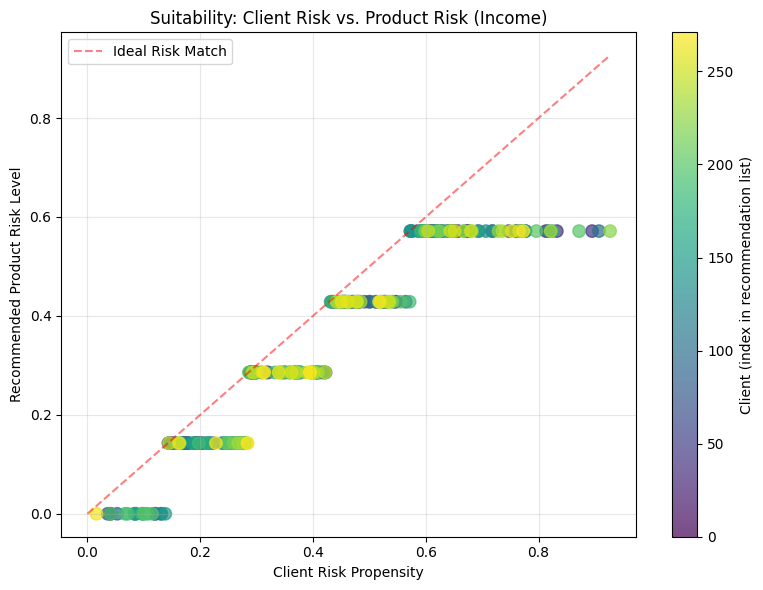

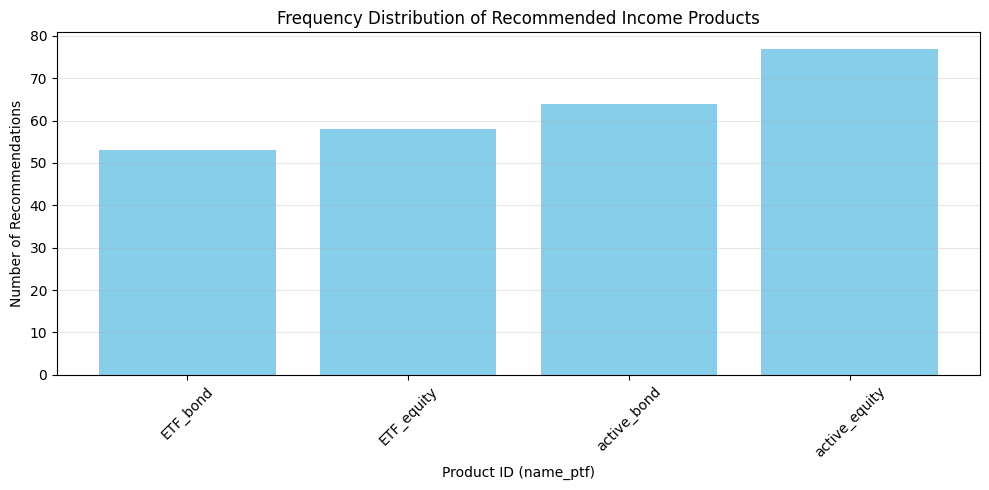


Most recommended Income products (Top 3):
  • Product 'active_equity': Risk = 0.5714285714285714  → recommended to 77 clients
  • Product 'active_bond': Risk = 0.2857142857142857  → recommended to 64 clients
  • Product 'ETF_equity': Risk = 0.42857142857142855  → recommended to 58 clients


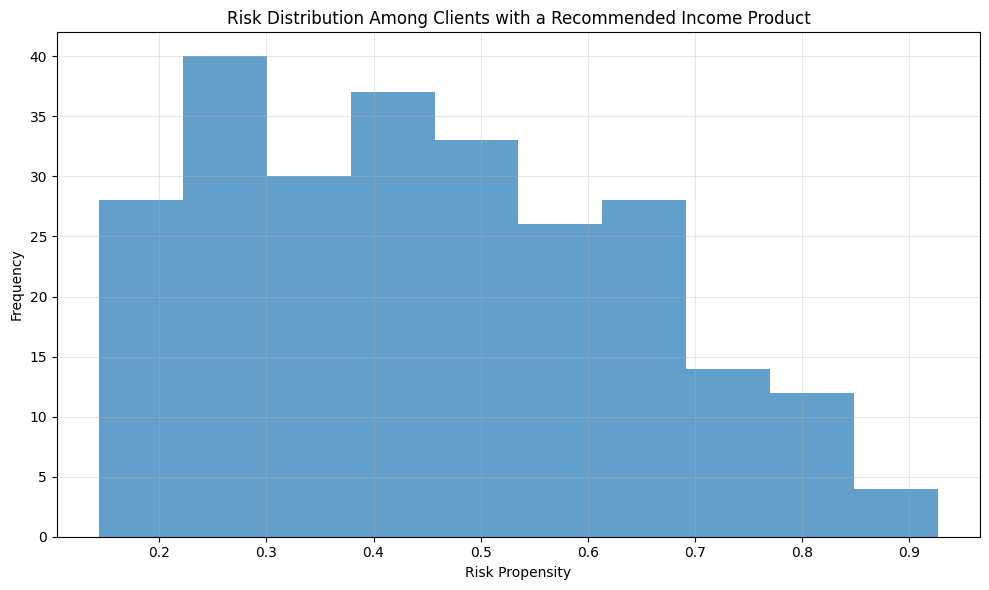

In [6]:
# 1) Instantiate
recommender = PortfolioRecommender(predictor=pred)
y_pred= pred.model.predict(pred.X_test)
# 2) Generate “Accumulation” recommendations
nba_accum = recommender.recommend_for_target(y_pred=y_pred[:,0], target_flag='Accumulation')

# 3) Generate “Income” recommendations
nba_income = recommender.recommend_for_target(y_pred=y_pred[:,1], target_flag='Income')
